In [ ]:
import pandas as pd

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Loan.xlsx to Loan.xlsx


In [ ]:
data= pd.read_excel('Loan.xlsx')

In [ ]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,Yes,1,Graduate,No,4583,1508.0,128,360.0,1.0,Rural,N
1,Male,Yes,0,Graduate,Yes,3000,0.0,66,360.0,1.0,Urban,Y
2,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360.0,1.0,Urban,Y
3,Male,No,0,Graduate,No,6000,0.0,141,360.0,1.0,Urban,Y
4,Male,Yes,0,Not Graduate,No,2333,1516.0,95,360.0,1.0,Urban,Y


In [ ]:
categorical_cols = data.select_dtypes(include=['object']).columns

In [ ]:
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns

In [ ]:
imputer_num=SimpleImputer(strategy='mean')
data[numerical_cols]=imputer_num.fit_transform(data[numerical_cols])

In [ ]:
imputer_cat=SimpleImputer(strategy='most_frequent')
data[categorical_cols]=imputer_cat.fit_transform(data[categorical_cols])

In [ ]:
data_encoded=pd.get_dummies(data, columns=categorical_cols, drop_first=True)

In [ ]:
data_encoded.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,4583.0,1508.0,128.0,360.0,1.0,True,True,True,False,False,False,False,False,False,False
1,3000.0,0.0,66.0,360.0,1.0,True,True,False,False,False,False,True,False,True,True
2,2583.0,2358.0,120.0,360.0,1.0,True,True,False,False,False,True,False,False,True,True
3,6000.0,0.0,141.0,360.0,1.0,True,False,False,False,False,False,False,False,True,True
4,2333.0,1516.0,95.0,360.0,1.0,True,True,False,False,False,True,False,False,True,True


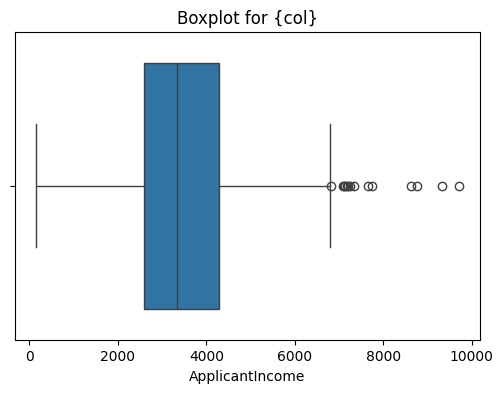

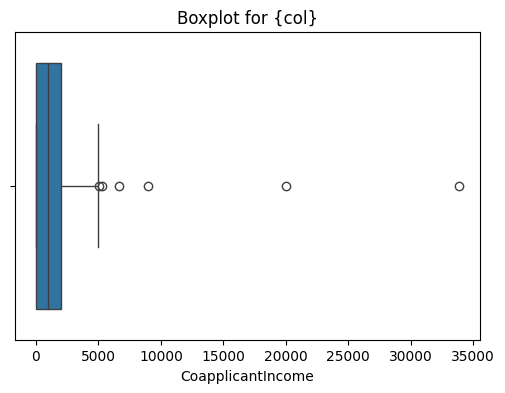

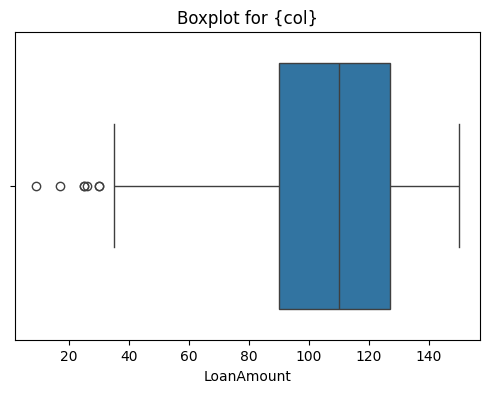

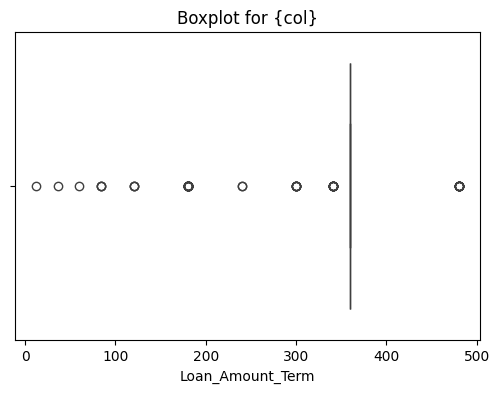

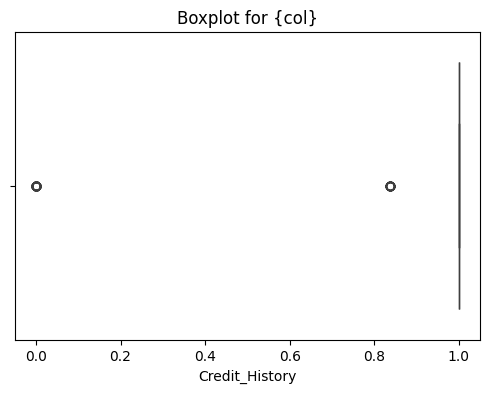

In [ ]:
for columns in numerical_cols:
  plt.figure(figsize=(6,4))
  sns.boxplot(data=data_encoded, x=columns)
  plt.title('Boxplot for {col}')
  plt.show()

In [ ]:
  q1= data_encoded[numerical_cols].quantile(0.25)
  q3= data_encoded[numerical_cols].quantile(0.75)
  iqr= q3-q1

In [ ]:
outliers= ((data_encoded[numerical_cols]<(q1-1.5*iqr))|(data_encoded[numerical_cols]>(q3+1.5*iqr))).any(axis=1)

In [ ]:
outliers.sum()

149

In [ ]:
X = data_encoded.drop(columns=['Loan_Status_Y'])
y = data_encoded['Loan_Status_Y']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
x_train.shape, x_test.shape

((266, 14), (115, 14))

Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
y_pred = log_reg.predict(x_test)

In [ ]:
print("Logistic Regression Accuracy:",accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Logistic Regression Accuracy: 0.8173913043478261
[[14 21]
 [ 0 80]]
              precision    recall  f1-score   support

       False       1.00      0.40      0.57        35
        True       0.79      1.00      0.88        80

    accuracy                           0.82       115
   macro avg       0.90      0.70      0.73       115
weighted avg       0.86      0.82      0.79       115



Linear Discriminant Analysis (LDA)

In [ ]:
lda=LDA()

In [ ]:
lda.fit(x_train, y_train)

LinearDiscriminantAnalysis()

In [ ]:
y_pred_lda=lda.predict(x_test)

In [ ]:
print("LDA Accuracy:",accuracy_score(y_test, y_pred_lda))
print(confusion_matrix(y_test, y_pred_lda))
print(classification_report(y_test, y_pred_lda))

LDA Accuracy: 0.808695652173913
[[14 21]
 [ 1 79]]
              precision    recall  f1-score   support

       False       0.93      0.40      0.56        35
        True       0.79      0.99      0.88        80

    accuracy                           0.81       115
   macro avg       0.86      0.69      0.72       115
weighted avg       0.83      0.81      0.78       115



K-Nearest Neighbours KNN

In [ ]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred_knn=knn.predict(x_test)

In [ ]:
print("KNN Accuracy:",accuracy_score(y_test, y_pred_knn))
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

KNN Accuracy: 0.6869565217391305
[[10 25]
 [11 69]]
              precision    recall  f1-score   support

       False       0.48      0.29      0.36        35
        True       0.73      0.86      0.79        80

    accuracy                           0.69       115
   macro avg       0.61      0.57      0.58       115
weighted avg       0.66      0.69      0.66       115



Decision Tree Classifier

In [ ]:
tree=DecisionTreeClassifier()
tree.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred_tree=tree.predict(x_test)

In [ ]:
print("Decision Tree Accuracy:",accuracy_score(y_test, y_pred_tree))
print(confusion_matrix(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))

Decision Tree Accuracy: 0.7565217391304347
[[19 16]
 [12 68]]
              precision    recall  f1-score   support

       False       0.61      0.54      0.58        35
        True       0.81      0.85      0.83        80

    accuracy                           0.76       115
   macro avg       0.71      0.70      0.70       115
weighted avg       0.75      0.76      0.75       115

